### Import all the libraries reqired to run the *tasks*

In [216]:
import numpy as np                           
import pandas as pd
import matplotlib.pyplot as plt
from random import randrange
import re
from itertools import islice
from nltk.corpus import stopwords
import seaborn as sb

### Mount the drive so that we can acces the contents from it

In [217]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load the JSON dataset

In [218]:
DATA_JSON_FILE = '/content/drive/MyDrive/News_Category_Dataset_v2.json'

### We can see that all the columns are displayed

In [219]:
data = pd.read_json(DATA_JSON_FILE, lines=True)
data.head(5)

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


### Check for Unique Categories


In [220]:
unique_category = data['category'].unique()
print(unique_category)

['CRIME' 'ENTERTAINMENT' 'WORLD NEWS' 'IMPACT' 'POLITICS' 'WEIRD NEWS'
 'BLACK VOICES' 'WOMEN' 'COMEDY' 'QUEER VOICES' 'SPORTS' 'BUSINESS'
 'TRAVEL' 'MEDIA' 'TECH' 'RELIGION' 'SCIENCE' 'LATINO VOICES' 'EDUCATION'
 'COLLEGE' 'PARENTS' 'ARTS & CULTURE' 'STYLE' 'GREEN' 'TASTE'
 'HEALTHY LIVING' 'THE WORLDPOST' 'GOOD NEWS' 'WORLDPOST' 'FIFTY' 'ARTS'
 'WELLNESS' 'PARENTING' 'HOME & LIVING' 'STYLE & BEAUTY' 'DIVORCE'
 'WEDDINGS' 'FOOD & DRINK' 'MONEY' 'ENVIRONMENT' 'CULTURE & ARTS']


In [221]:
data['categoryId'] = data['category'].factorize()[0]
data.head()

,category,headline,authors,link,short_description,date,categoryId
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,0
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,1
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,1
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,1
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,1


### Create new column to give category Id for each category
Left most column shows the count of headlines in each category
### Creating a new pandas dataframe "category", which has only unique Categories. Along with it sorting this list in order of CategoryId values


In [222]:
category = data[['category', 'categoryId']].drop_duplicates().sort_values('categoryId')
category

,category,categoryId
0,CRIME,0
1,ENTERTAINMENT,1
11,WORLD NEWS,2
12,IMPACT,3
13,POLITICS,4
20,WEIRD NEWS,5
27,BLACK VOICES,6
35,WOMEN,7
37,COMEDY,8
69,QUEER VOICES,9


Bar plot to visualize the categories and numbers

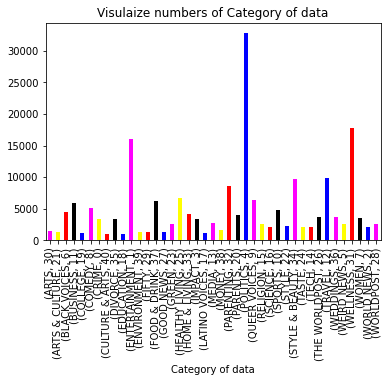

In [223]:
import matplotlib.pyplot as plt
data.groupby('category').categoryId.value_counts().plot(kind = "bar", color = ["magenta", "yellow", "red", "black", "blue"])
plt.xlabel("Category")
plt.title("Number of data in each category")
plt.show()

### Draw a Pie chart to show the number of articles in each category in %


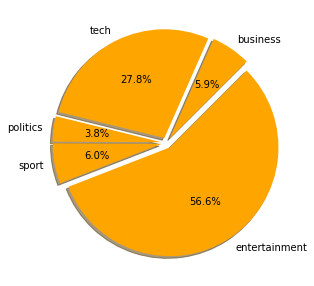

In [224]:
fig = plt.figure(figsize = (5,5))
colors = ["orange"]
business = data[data['categoryId'] == 0 ]
tech = data[data['categoryId'] == 1 ]
politics = data[data['categoryId'] == 2]
sport = data[data['categoryId'] == 3]
entertainment = data[data['categoryId'] == 4]
count = [business['categoryId'].count(), tech['categoryId'].count(), politics['categoryId'].count(), sport['categoryId'].count(), entertainment['categoryId'].count()]
pie = plt.pie(count, labels = ['business', 'tech', 'politics', 'sport', 'entertainment'],
              autopct = "%1.1f%%",
              shadow = True,
              colors = colors,
              startangle = 45,
              explode = (0.05, 0.05, 0.05, 0.05,0.05))

###Drop the columns which are not needed

In [225]:
df = pd.DataFrame(data)
df.drop(df.iloc[:, 2::], inplace = True, axis = 1)


### Data Cleaning

### Before cleaning

In [226]:
train_data.head(3)

,category,headline,authors,link,short_description,date,categoryId
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,0
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,1
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,1


### After cleaning
Removes punctuations, convert text to lower case

In [227]:
df['headline'] = df['headline'].str.replace('\W', ' ') # Removes punctuation
df['headline'] = df['headline'].str.lower()
df.head(20)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,category,headline
0,CRIME,there were 2 mass shootings in texas last week...
1,ENTERTAINMENT,will smith joins diplo and nicky jam for the 2...
2,ENTERTAINMENT,hugh grant marries for the first time at age 57
3,ENTERTAINMENT,jim carrey blasts castrato adam schiff and d...
4,ENTERTAINMENT,julianna margulies uses donald trump poop bags...
5,ENTERTAINMENT,morgan freeman devastated that sexual harass...
6,ENTERTAINMENT,donald trump is lovin new mcdonald s jingle i...
7,ENTERTAINMENT,what to watch on amazon prime that s new this ...
8,ENTERTAINMENT,mike myers reveals he d like to do a fourth ...
9,ENTERTAINMENT,what to watch on hulu that s new this week


### Create new dataframe with this dictionary

In [251]:
word_counts_per_sms = {'there': [1,0,0],
                       'were': [1,0,0],
                       '2': [1,0,0],
                       'mass': [1,0,0],
                       'shootings': [1,0,0],
                       'in': [1,0,0],
                       'texas': [1,0,0],
                       'last': [1,0,0],
                       'week': [1,0,0],
                       'but':[1,0,0],
                       'only':[1,0,0],
                       '1':[1,0,0],
                       'on':[1,0,0],
                       'tv':[1,0,0]
                      }

word_counts = pd.DataFrame(word_counts_per_sms)
word_counts.head()

,there,were,2,mass,shootings,in,texas,last,week,but,only,1,on,tv
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [228]:
def filtering(text):
    stopwords=[]
    text = text.replace('\t', '')
    text = text.replace('\n', '')
    text = text.replace('\r', '')                                          
    for word in text.split(" "):
        if word in stopwords:
            text=text.replace(word,'')
    text = text.rstrip() 
    reg_Exp = '[^a-zA-z\s]'
    text = re.sub(reg_Exp, '', text)
    return text
filtering("")

''

### Now we need to split the data into 80% Train, 20% Dev Data, 20% Test data

In [229]:
train_data = data[:int(0.8*len(data))]
test_and_dev_data = data[int(0.8*len(data)):]
                                                                       

dev_data=test_and_dev_data[:int(0.2 * len(test_and_dev_data))]
test_data=test_and_dev_data[int(0.2 * len(test_and_dev_data)):]

print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160682 entries, 0 to 160681
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   category           160682 non-null  object        
 1   headline           160682 non-null  object        
 2   authors            160682 non-null  object        
 3   link               160682 non-null  object        
 4   short_description  160682 non-null  object        
 5   date               160682 non-null  datetime64[ns]
 6   categoryId         160682 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 8.6+ MB
None


In [256]:
print(dev_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8034 entries, 160682 to 168715
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   category           8034 non-null   object        
 1   headline           8034 non-null   object        
 2   authors            8034 non-null   object        
 3   link               8034 non-null   object        
 4   short_description  8034 non-null   object        
 5   date               8034 non-null   datetime64[ns]
 6   categoryId         8034 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 439.5+ KB
None


In [257]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32137 entries, 168716 to 200852
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   category           32137 non-null  object        
 1   headline           32137 non-null  object        
 2   authors            32137 non-null  object        
 3   link               32137 non-null  object        
 4   short_description  32137 non-null  object        
 5   date               32137 non-null  datetime64[ns]
 6   categoryId         32137 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 1.7+ MB
None


We can see the count of articles for each category

In [230]:
train_data['category'].value_counts() 

POLITICS          32739
ENTERTAINMENT     15291
WELLNESS           8631
HEALTHY LIVING     6694
TRAVEL             5818
QUEER VOICES       5681
BUSINESS           5007
SPORTS             4512
COMEDY             4418
PARENTING          4298
BLACK VOICES       4115
PARENTS            3955
THE WORLDPOST      3664
STYLE & BEAUTY     3582
WOMEN              3490
FOOD & DRINK       3465
CRIME              3158
IMPACT             3041
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
WORLD NEWS         2177
TASTE              2096
HOME & LIVING      2056
DIVORCE            1833
WEDDINGS           1754
SCIENCE            1732
TECH               1537
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1129
EDUCATION          1004
ENVIRONMENT         710
CULTURE & ARTS      538
MONEY               270
Name: category, 

### We need to now separate features and target

In [231]:
X_train = train_data['headline']
y_train = train_data['category']
                                                    
X_dev = dev_data['headline']
y_dev = dev_data['category']


X_test = test_data['headline']
y_test = test_data['category']


### Calculate Prior Probability. Also show prob of each category in Train dataset

In [232]:
train_category1 = train_data.loc[train_data.category == 'CRIME']
train_category2 = train_data.loc[train_data.category == 	'ENTERTAINMENT']
train_category3 = train_data.loc[train_data.category == 	'WORLD NEWS']
def cal_prior_probs(y_train):
  prior_Probability = {}
  for category in np.unique(y_train):
    categorycount = sum(y_train == category)
    prior_Probability[category] = categorycount / y_train.size
  return prior_Probability

prior_Probability = cal_prior_prob(y_train)


print("Total articles of category CRIME in train dataset : ",len(train_category1))
print("Total articles of category ENTERTAINMENT in train dataset : ",len(train_category2))
print("Total articles of category WORLD NEWS in train dataset : ",len(train_category3))

print("Prior probability in train article dataset of CRIME category: ",prior_Probability['CRIME'])
print("Prior probability in train article dataset of ENTERTAINMENT category : ",prior_Probability['ENTERTAINMENT'])
print("Prior probability in train article dataset of WORLD NEWS category: ",prior_Probability['WORLD NEWS'])

Total articles of category CRIME in train dataset :  3158
Total articles of category ENTERTAINMENT in train dataset :  15291
Total articles of category WORLD NEWS in train dataset :  2177
Prior probability in train article dataset of CRIME category:  0.019653725992955028
Prior probability in train article dataset of ENTERTAINMENT category :  0.0951631172128801
Prior probability in train article dataset of WORLD NEWS category:  0.013548499520792621


### We need to build vocabulary list and dictionary

In [233]:
def construct_dict(data):
    frequency_words = {}
    total_words=[]
    remove=[]
    for sentence in data:
            words=[]
            sentence = filtering(sentence)                               
            words=sentence.split(' ')
            for word in set(words) :
                word = word.lower()
                if word not in frequency_words.keys():
                    frequency_words[word] = 1
                    total_words.append(word)
                else:
                    frequency_words[word] += 1
    return frequency_words, total_words

    
       
freq_of_all_words,train_of_all_words=construct_dict(X_train)
print(train_of_all_words)
freq_of_all_words

['', 'on', 'week', 'shootings', 'mass', 'in', 'but', 'only', 'texas', 'last', 'tv', 'were', 'there', 'cups', 'jam', 'for', 'official', 'smith', 'will', 'joins', 'world', 'the', 'song', 'and', 'diplo', 'nicky', 'time', 'grant', 'at', 'marries', 'first', 'hugh', 'age', 'jim', 'blasts', 'democrats', 'new', 'adam', 'castrato', 'carrey', 'schiff', 'artwork', 'margulies', 'trump', 'bags', 'to', 'poop', 'julianna', 'dog', 'up', 'uses', 'donald', 'pick', 'her', 'after', 'devastated', 'legacy', 'could', 'freeman', 'undermine', 'harassment', 'sexual', 'that', 'morgan', 'claims', 'lovin', 'jingle', 'tonight', 'bit', 'is', 'show', 'mcdonalds', 'this', 'watch', 'what', 'amazon', 'thats', 'prime', 'myers', 'hed', 'a', 'reveals', 'fourth', 'mike', 'do', 'film', 'powers', 'like', 'austin', 'hulu', 'justin', 'school', 'timberlake', 'shooting', 'victims', 'visits', 'summit', 'jong', 'talk', 'north', 'south', 'meets', 'korean', 'kim', 'un', 'president', 'koreas', 'its', 'life', 'region', 'oystergrowing',

{'': 26898,
 'on': 13679,
 'week': 1380,
 'shootings': 111,
 'mass': 255,
 'in': 24335,
 'but': 1822,
 'only': 748,
 'texas': 578,
 'last': 686,
 'tv': 631,
 'were': 939,
 'there': 560,
 'cups': 25,
 'jam': 47,
 'for': 19236,
 'official': 311,
 'smith': 215,
 'will': 3761,
 'joins': 156,
 'world': 2197,
 'the': 44524,
 'song': 312,
 'and': 17814,
 'diplo': 5,
 'nicky': 7,
 'time': 2036,
 'grant': 29,
 'at': 6768,
 'marries': 38,
 'first': 2247,
 'hugh': 59,
 'age': 404,
 'jim': 113,
 'blasts': 143,
 'democrats': 793,
 'new': 6811,
 'adam': 156,
 'castrato': 1,
 'carrey': 22,
 'schiff': 13,
 'artwork': 23,
 'margulies': 3,
 'trump': 9463,
 'bags': 57,
 'to': 38399,
 'poop': 36,
 'julianna': 2,
 'dog': 615,
 'up': 3171,
 'uses': 251,
 'donald': 4562,
 'pick': 274,
 'her': 2952,
 'after': 4555,
 'devastated': 20,
 'legacy': 204,
 'could': 2057,
 'freeman': 14,
 'undermine': 32,
 'harassment': 288,
 'sexual': 755,
 'that': 4896,
 'morgan': 77,
 'claims': 514,
 'lovin': 8,
 'jingle': 10,
 '

### To find occurrences/prob of all the words

In [234]:
freq_of_all_words,train_of_all_words=construct_dict(X_train)                      
for word in freq_of_all_words:
        print(word,"-#-",freq_of_all_words[word]," **Probability of the each",word,"is =",freq_of_all_words[word]/len(train_data))

Streaming output truncated to the last 5000 lines.
madonnaapproved -#- 1  **Probability of the each madonnaapproved is = 6.2234724486874695e-06
smallscale -#- 1  **Probability of the each smallscale is = 6.2234724486874695e-06
cellulitefighting -#- 1  **Probability of the each cellulitefighting is = 6.2234724486874695e-06
bockoras -#- 1  **Probability of the each bockoras is = 6.2234724486874695e-06
allboy -#- 1  **Probability of the each allboy is = 6.2234724486874695e-06
distortion -#- 1  **Probability of the each distortion is = 6.2234724486874695e-06
saloon -#- 2  **Probability of the each saloon is = 1.2446944897374939e-05
tulips -#- 2  **Probability of the each tulips is = 1.2446944897374939e-05
saxophone -#- 1  **Probability of the each saxophone is = 6.2234724486874695e-06
mountaineering -#- 2  **Probability of the each mountaineering is = 1.2446944897374939e-05
beautifiers -#- 1  **Probability of the each beautifiers is = 6.2234724486874695e-06
kludge -#- 1  **Probability of t

### Conditional Probability calculation. Consider two categories 'CRIME'&'ENTERTAINMENT'



In [235]:
def fit(train_data,X_train):

    train_crime_headlines=train_data.loc[train_data.category=='CRIME'].headline
    freq_crime_words,words_crime=construct_dict(train_crime_headlines)
    train_entertainment_headlines=train_data.loc[train_data.category=='ENTERTAINMENT'].headline
    freq_entertainment_words,words_entertainment=construct_dict(train_entertainment_headlines)


    freq_crime_words.pop('', None)
    condi_prob_crime={}
    for word in freq_crime_words:
        condi_prob_crime[word]=freq_crime_words[word]/len(train_crime_headlines)

    freq_entertainment_words.pop('', None)                         
    condi_prob_entertainment={}
    for word in freq_entertainment_words:
        condi_prob_entertainment[word]=freq_entertainment_words[word]/len(train_entertainment_headlines) 
           
    return condi_prob_crime,condi_prob_entertainment
    
condi_prob_crime_train,condi_prob_entertainment_train=fit(train_data,X_train)  
print(condi_prob_crime_train)
print(condi_prob_entertainment_train)

{'on': 0.08771374287523749, 'week': 0.0034832172260924636, 'shootings': 0.006649778340721976, 'mass': 0.008233058898036731, 'in': 0.29987333755541484, 'but': 0.00253324889170361, 'only': 0.00253324889170361, 'texas': 0.024699176694110196, 'last': 0.00253324889170361, 'tv': 0.0034832172260924636, 'were': 0.007283090563647878, 'there': 0.001266624445851805, 'dolezal': 0.00031665611146295124, 'rachel': 0.00031665611146295124, 'for': 0.12381253958201394, 'charges': 0.013616212792906902, 'felony': 0.0009499683343888537, 'welfare': 0.00031665611146295124, 'faces': 0.008233058898036731, 'fraud': 0.0018999366687777073, 'knife': 0.004116529449018366, 'pulling': 0.00031665611146295124, 'stun': 0.0009499683343888537, 'gun': 0.02121595946801773, 'students': 0.007283090563647878, 'man': 0.12571247625079163, 'at': 0.07758074730842306, 'muslim': 0.006966434452184927, 'after': 0.12191260291323623, 'mcdonalds': 0.002849905003166561, 'people': 0.011716276124129196, 'school': 0.026915769474350856, 'shoot

### Top words of category = CRIME

In [236]:

dictionary_1 = condi_prob_crime_train
sorted_dict = {}
sorted_keys = sorted(dictionary_1, key=dictionary_1.get,reverse=True)  

for w in sorted_keys:
    sorted_dict[w] = dictionary_1[w]

def take(n, iterable):
    
    return list(islice(iterable, n))

items_category_crime = take(10, sorted_dict.items())
print(items_category_crime)

[('in', 0.29987333755541484), ('of', 0.19252691576947434), ('to', 0.181760607979734), ('police', 0.13521215959468016), ('man', 0.12571247625079163), ('for', 0.12381253958201394), ('after', 0.12191260291323623), ('on', 0.08771374287523749), ('with', 0.08201393286890438), ('the', 0.07884737175427486)]


### Top words of category = entertainment



In [237]:
dictionary_2 = condi_prob_entertainment_train
sorted_dict = {}
sorted_keys = sorted(dictionary_2, key=dictionary_2.get,reverse=True)  

for w in sorted_keys:
    sorted_dict[w] = dictionary_2[w]
    
items_category_entertainment = take(10, sorted_dict.items())
print(items_category_entertainment)

[('the', 0.305473808122425), ('to', 0.19226996272317048), ('of', 0.16140213197305606), ('in', 0.16100974429402917), ('a', 0.1589824079523903), ('and', 0.1550585311621215), ('is', 0.1263488326466549), ('for', 0.10829899941141848), ('on', 0.10614086717677065), ('with', 0.09620037930808972)]


### Calculating the accuracy

In [238]:
def scoring(real, prediction):
    value = 0
    for i in range(len(real)):                                
        if real[i] == prediction[i]:
            value+=1
    accuracy=value/len(real)*100
    return accuracy

### We need to make the predictions now by using values of conditional prob of category CRIME & ENTERTAINMENT

In [239]:
def pred(data,ans,condi_prob_crime,condi_prob_entertainment):
    y_preds=[]
    for sentence in data:
        sentence=filtering(sentence)
        category_1=1                                         
        category_2=1
        for word in sentence.split(' '):
            word=word.lower()
            if word not in condi_prob_crime.keys():
                condi_prob_crime[word]=0.0
            if word not in condi_prob_entertainment.keys():
                condi_prob_entertainment[word]=0.0
            category_1*=condi_prob_crime[word]
            category_2*=condi_prob_entertainment[word]
        crime_post=category_1*prior_probs[1]
        entertain_post=category_2*prior_probs[0]
        if crime_post>entertain_post:
            y_preds.append(1)
        else:
            y_preds.append(0)
    
    return scoring(ans.tolist(),y_preds)
print("Accuracy on training data before smoothing --",pred(X_train,y_train,condi_prob_crime_train,condi_prob_entertainment_train) )   
print("Accuracy on development data before smoothing--",pred(X_dev,y_dev,condi_prob_crime_train,condi_prob_entertainment_train))
print("Accuracy on test data before smoothing--",pred(X_test,y_test,condi_prob_crime_train,condi_prob_entertainment_train))

Accuracy of train data before smoothing : 0.0
Accuracy of dev data before smoothing-: 0.0
Accuracy of test data before smoothing: 0.0


Split the dataset into given number of folds

In [247]:
def crossvalidationsplit(dataset, kfolds):
  split_data = []
  dataset_copy = dataset
  size = int(len(dataset) / kfolds)
  for _ in range(kfolds):
    fold = []
    while len(fold) < size:
      r = randrange(dataset_copy.shape[0])
      index = dataset_copy.index[r]
      fold.append(dataset_copy.loc[index].values.tolist())
      dataset_copy = dataset_copy.drop(index)
    split_data.append(fold)
  return split_data

In [250]:
import numpy as np
from sklearn.model_selection import KFold
# data sample
data = np.array(dev_data)
# prepare cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
# enumerate splits
for train, test in kfold.split(data):
  print('train: %s, test: %s' % (data[train], data[test]))

train: [['PARENTING'
  'What Are Your Kids Really Doing on Their Cell Phones and How Can You Keep Them Safe?'
  'Risa Ferman, Contributor\nDistrict Attorney, Montgomery County, Pennsylvania'
  ...
  'How many of us have handed over a mobile device that gives our children complete access to the world, with all of its lures and dangers? Many of us feel helpless when faced with youthful demands for technology and our own inability to understand how it can be used -- or misused.'
  Timestamp('2013-04-03 00:00:00') 32]
 ['WELLNESS'
  'Tonsillectomy Could Help Some Adults With Recurrent Sore Throats, Study Finds'
  '' ...
  'According to the Mayo Clinic, tonsillectomy is used most often today to treat sleep-disordered breathing, though it is also'
  Timestamp('2013-04-03 00:00:00') 31]
 ['PARENTING' 'Cute Kid Note Of The Day: How To Bother Your Brother'
  'Emma Mustich' ...
  'Next Cute Kid Note of the Day: Thalia\'s Rap No. 5? The missing item on the list (Carolyn says she "ran out of steam

In [ ]:
def Kfold(data):     #For k=5
    
    data_split=np.array_split(data,5)
    headline_split=np.array_split(data['headline'],5)
    category_split=np.array_split(data['category'],5)
    kfold_acc=[]
    
    
    array_t1= np.concatenate((data_split[1],data_split[2],data_split[3],data_split[4]))
    array_p1=np.concatenate((headline_split[1],headline_split[2],headline_split[3],headline_split[4]))
    dfd1 = pd.DataFrame(array_t1, columns = ['headline','category'])
    dfx1= df = pd.DataFrame(array_p1, columns = ['headline'])
    condi_prob_dev_crime,neg_condi_prob_dev=fit(dfd1,dfx1)
    acc=pred(headline_split[0],category_split[0],condi_prob_dev_crime,neg_condi_prob_dev)    
    kfold_acc.append(acc)

    
    array_t2= np.concatenate((data_split[0],data_split[2],data_split[3],data_split[4]))
    array_p2=np.concatenate((headline_split[0],headline_split[2],headline_split[3],headline_split[4]))
    frame_d2 = pd.DataFrame(array_t2, columns = ['headline','category'])
    frame_x2= df = pd.DataFrame(array_p2, columns = ['headline'])
    condi_prob_dev_crime,condi_prob_dev_enter=fit(frame_d2,frame_x2)
    acc=pred(headline_split[1],category_split[1],condi_prob_dev_crime,condi_prob_dev_enter)    
    kfold_acc.append(acc)
    
    array_t3= np.concatenate((data_split[0],data_split[1],data_split[3],data_split[4]))
    array_p3=np.concatenate((headline_split[0],headline_split[1],headline_split[3],headline_split[4]))
    frame_d3 = pd.DataFrame(array_t3, columns = ['headline','category'])
    frame_x3= df = pd.DataFrame(array_p3, columns = ['headline'])
    condi_prob_dev_crime,condi_prob_dev_enter=fit(frame_d3,frame_x3)
    acc=pred(headline_split[2],category_split[2],condi_prob_dev_crime,condi_prob_dev_enter)    
    kfold_acc.append(acc)
    
    array_t4= np.concatenate((data_split[0],data_split[1],data_split[2],data_split[4]))
    array_p4=np.concatenate((headline_split[0],headline_split[1],headline_split[2],headline_split[4]))
    frame_d4 = pd.DataFrame(array_t4, columns = ['headline','category'])
    frame_x4= df = pd.DataFrame(array_p4, columns = ['headline'])
    condi_prob_dev_crime,condi_prob_dev_enter=fit(frame_d4,frame_x4)
    acc=pred(headline_split[3],category_split[3],condi_prob_dev_crime,condi_prob_dev_enter)    
    kfold_acc.append(acc)
    

    array_t5= np.concatenate((data_split[0],data_split[1],data_split[2],data_split[3]))
    array_p5=np.concatenate((headline_split[0],headline_split[1],headline_split[2],headline_split[3]))
    frame_d5 = pd.DataFrame(array_t5, columns = ['headline','category'])
    frame_x5= df = pd.DataFrame(array_p5, columns = ['headline'])
    condi_prob_dev_crime,condi_prob_dev_enter=fit(frame_d5,frame_x5)
    acc=pred(headline_split[4],category_split[4],condi_prob_dev_crime,condi_prob_dev_enter)    
    kfold_acc.append(acc)

    return fold_acc
        
        
l=Kfold(dev_data)    
print(" Cross validation acuuracy Average--", sum(l)/len(l) )

In [240]:
train_crime_headlines=train_data.loc[train_data.category=='CRIME'].headline
train_entertainment_headlines=train_data.loc[train_data.category=='ENTERTAINMENT'].headline

In [241]:
freq_crime_words,words_crime=construct_dict(train_crime_headlines)
freq_entertainment_words,words_entertainment=construct_dict(train_entertainment_headlines)

### Find conditional probability with smoothing effect. This is advantage of Naive Bayes

In [245]:
def fit_smoothing(train_data,X_train):
    freq_of_all_words,train_of_all_words=construct_dict(X_train)
    train_crime_headlines=train_data.loc[train_data.category=='CRIME'].headline
    freq_crime_words,words_crime=construct_dict(train_crime_headlines)
    train_entertainment_headlines=train_data.loc[train_data.category=='ENTERTAINMENT'].headline
    freq_entertainment_words,words_entertainment=construct_dict(train_entertainment_headlines)

    freq_entertainment_words.pop('', None)                                            
    condi_prob_entertainment={}
    for word in freq_entertainment_words:
        condi_prob_entertainment[word]=(freq_entertainment_words[word]+1)/(len(train_entertainment_headlines) +len(words_entertainment) )
        
    freq_crime_words.pop('', None)
    condi_prob_crime={}
    for word in freq_crime_words:
        condi_prob_crime[word]=(freq_crime_words[word]+1)/(len(train_crime_headlines) + len(words_crime))
    
    
    return condi_prob_crime,condi_prob_entertainment
    
condi_prob_crime,condi_prob_entertainment=fit_smoothing(train_data,X_train) 
print(condi_prob_crime)
print(condi_prob_entertainment)

{'on': 0.03023053501522401, 'week': 0.0013049151805132667, 'shootings': 0.0023923444976076554, 'mass': 0.00293605915615485, 'in': 0.10308829926054806, 'but': 0.00097868638538495, 'only': 0.00097868638538495, 'texas': 0.008590691605045673, 'last': 0.00097868638538495, 'tv': 0.0013049151805132667, 'were': 0.0026098303610265334, 'there': 0.0005437146585471945, 'dolezal': 0.00021748586341887777, 'rachel': 0.00021748586341887777, 'for': 0.042627229230100046, 'charges': 0.004784688995215311, 'felony': 0.00043497172683775554, 'welfare': 0.00021748586341887777, 'faces': 0.00293605915615485, 'fraud': 0.0007612005219660722, 'knife': 0.0015224010439321444, 'pulling': 0.00021748586341887777, 'stun': 0.00043497172683775554, 'gun': 0.007394519356241845, 'students': 0.0026098303610265334, 'man': 0.043279686820356676, 'at': 0.026750761200521965, 'muslim': 0.0025010874293170944, 'after': 0.04197477163984341, 'mcdonalds': 0.001087429317094389, 'people': 0.004132231404958678, 'school': 0.0093518921270117

## Apply laplace smoothing

In [243]:
def pred(data,ans):
    y_preds=[]
    for sentence in data:
        sentence=filtering(sentence)
        category_1=1
        category_2=1
        
        for word in sentence.split(' '):
            word=word.lower()         
            if word not in condi_prob_crime.keys():
                condi_prob_crime[word]=1/(len(train_crime_headlines)+len(words_crime))
            if word not in condi_prob_entertainment.keys():
                condi_prob_entertainment[word]=1/(len(train_entertainment_headlines)+len(words_entertainment))
            category_1*=condi_prob_crime[word]
            category_2*=condi_prob_entertainment[word]
        crime_post=category_1*prior_probs[1]
        entertainment_post=category_2*prior_probs[0]
        if crime_post>entertainment_post:
            y_preds.append(1)
        else:
            y_preds.append(0)
    
    return scoring(ans.tolist(),y_preds)
print("Accuracy on training data after smoothing--",pred(X_train,y_train) )   
print("Accuracy on development data after smoothing--",pred(X_dev,y_dev))
print("Accuracy on test data after smoothing--",pred(X_test,y_test))

0.0
Accuracy on training data after smoothing-- 0.0
0.0
Accuracy on development data after smoothing-- 0.0
0.0
Accuracy on test data after smoothing-- 0.0


For different values of Smoothing, we will plot the graph

In [ ]:
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
lap_acc = []
for alpha in alpha_values:
  
  alpha_preds = pred(X_test, alpha)
  
  alpha_accuracy = accuracy(y_test.to_list(), alpha_preds)
  lap_acc.append(alpha_accuracy)

sb.lineplot(alpha_values, lap_acc)
plot.xlabel('alpha value')
plot.ylabel('Accuracy')
plot.show()